# COVID-19 France - Active cases

Note that for the case of France, data is only given for hospitalized cases.

First let's import the data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7',delimiter=';')
df['jour']= pd.to_datetime(df['jour'])

In order to visualize the current situation in France, let's plot the cumulated cases in a stack plot as a sum of **current active cases (hospitalized)**, people already sent home and cumulated deaths in hospitals:

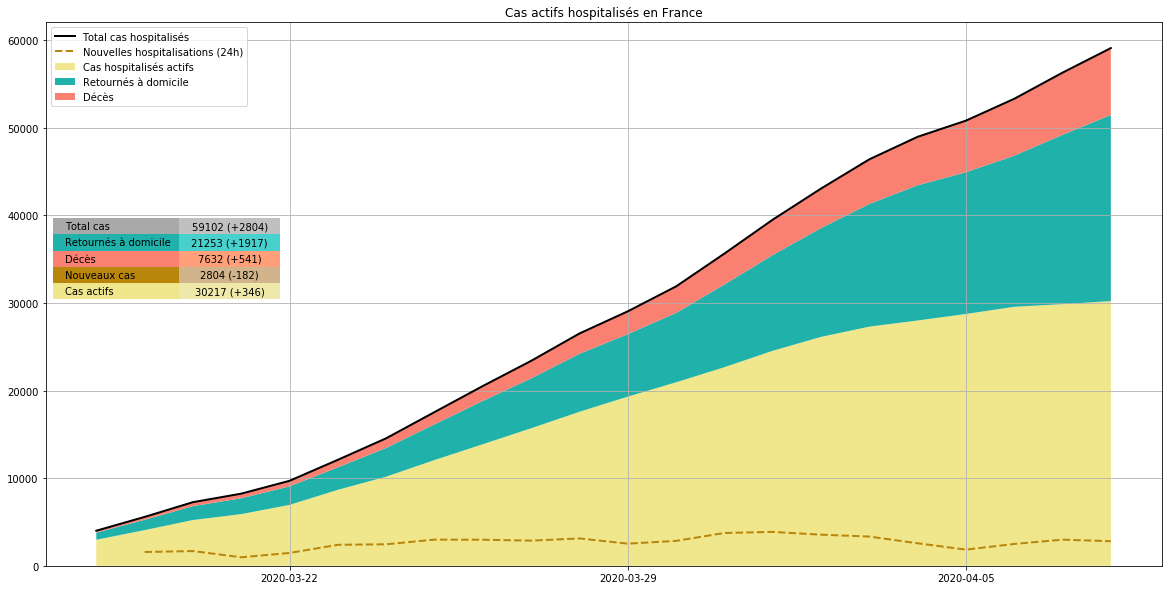

In [2]:
df2 = df[df['sexe'] == 0].groupby('jour').sum()
TOT = df2.hosp+df2.rad+df2.dc
fig1 = plt.figure(1,figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.set_title('Cas actifs hospitalisés en France')
ax1.stackplot(df2.index,df2.hosp,df2.rad,df2.dc,colors = ['khaki','lightseagreen','salmon'], labels = ['Cas hospitalisés actifs','Retournés à domicile','Décès'])
ax1.plot(df2.index,TOT,c='k',lineWidth = 2, label = 'Total cas hospitalisés')
ax1.plot(df2.index,TOT.diff(),'--',c='darkgoldenrod',lineWidth = 2, label = 'Nouvelles hospitalisations (24h)')
ax1.legend(loc = 2)
ax1.xaxis.set_major_locator(MultipleLocator(7))
ax1.grid()

row_labels=['Total cas','Retournés à domicile','Décès','Nouveaux cas','Cas actifs']
table_vals=[['%d (%+d)'%(TOT.iloc[-1],TOT.iloc[-1]-TOT.iloc[-2])],
            ['%d (%+d)'%(df2.rad[-1],df2.rad[-1]-df2.rad[-2])],
            ['%d (%+d)'%(df2.dc[-1],df2.dc[-1]-df2.dc[-2])],
            ['%d (%+d)'%(TOT.diff().iloc[-1],TOT.diff().iloc[-1]-TOT.diff().iloc[-2])],
            ['%d (%+d)'%(df2.hosp[-1],df2.hosp[-1]-df2.hosp[-2])]]
table = ax1.table(cellText=table_vals,
          rowLabels=row_labels,
          bbox=(0.12,0.49,0.09,0.15),          
          edges = 'BRTL',
          cellColours = [['silver'],['mediumturquoise'],['lightsalmon'],['tan'],['palegoldenrod']],
          rowColours = ['darkgrey','lightseagreen','salmon','darkgoldenrod','khaki'],
          cellLoc = 'center',
          zorder = 100)
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)

Since the official information is given by Departments, we can perform the previous computation for any of the French Departments. Note that the Department shall be given by its corresponding numeric identification. As an example, here you can see the plot for Isère (38):

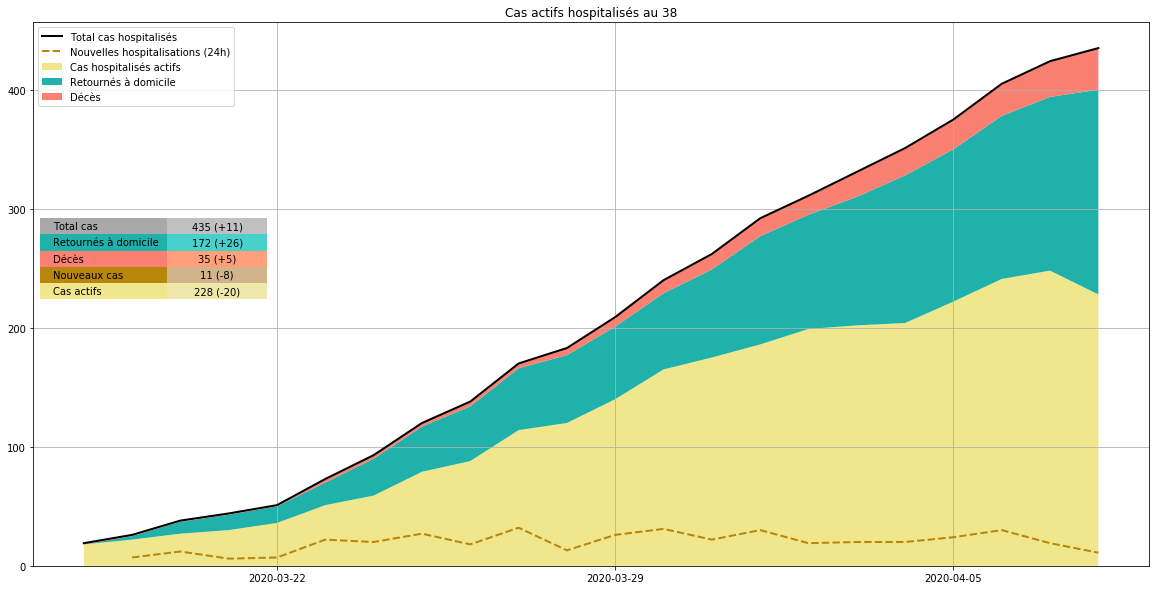

In [3]:
departement = 38

departement = str(departement)
df3 = df[(df['dep'] == departement) & (df['sexe'] == 0)].fillna(0)
TOT = df3.hosp+df3.rad+df3.dc
fig2 = plt.figure(2,figsize=(20,10))
ax2 = fig2.add_subplot(111)
ax2.set_title('Cas actifs hospitalisés au %s'%departement)
ax2.stackplot(df3.jour,df3.hosp,df3.rad,df3.dc,colors = ['khaki','lightseagreen','salmon'], labels = ['Cas hospitalisés actifs','Retournés à domicile','Décès'])
ax2.plot(df3.jour,TOT,c='k',lineWidth = 2, label = 'Total cas hospitalisés')
ax2.plot(df3.jour,TOT.diff(),'--',c='darkgoldenrod',lineWidth = 2, label = 'Nouvelles hospitalisations (24h)')
ax2.legend(loc = 2)
ax2.xaxis.set_major_locator(MultipleLocator(7))
ax2.grid()

row_labels=['Total cas','Retournés à domicile','Décès','Nouveaux cas','Cas actifs']
table_vals=[['%d (%+d)'%(TOT.iloc[-1],TOT.iloc[-1]-TOT.iloc[-2])],
            ['%d (%+d)'%(df3.rad.iloc[-1],df3.rad.iloc[-1]-df3.rad.iloc[-2])],
            ['%d (%+d)'%(df3.dc.iloc[-1],df3.dc.iloc[-1]-df3.dc.iloc[-2])],
            ['%d (%+d)'%(TOT.diff().iloc[-1],TOT.diff().iloc[-1]-TOT.diff().iloc[-2])],
            ['%d (%+d)'%(df3.hosp.iloc[-1],df3.hosp.iloc[-1]-df3.hosp.iloc[-2])]]
table = ax2.table(cellText=table_vals,
          rowLabels=row_labels,
          bbox=(0.12,0.49,0.09,0.15),          
          edges = 'BRTL',
          cellColours = [['silver'],['mediumturquoise'],['lightsalmon'],['tan'],['palegoldenrod']],
          rowColours = ['darkgrey','lightseagreen','salmon','darkgoldenrod','khaki'],
          cellLoc = 'center',
          zorder = 100)
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)